 Q4. Random Forest: For this question also, you have to use the same football dataset. The
 aim is to use the Random Forest model to do classification and regression both.

 (a) Classification: Your target column is ‘contribution type’. Process the data as you want,
 modify/drop any columns that you want, and play around with the hyperparameters.
 Try to understand and observe the difference in results. Try different losses (or quality
 criterion)– ‘gini’, ‘entropy’, ‘log loss’. After training the model, report test accuracy
 and f1 score.

 (b) Regression: Your target column is ‘overall’. Again, you are free to process the dataset
 and encouraged to try different hyperparameters. Use MSE and MAE one by one to train the models, and report test MSE and MAE for both models.

 Note: You can use sklearn library to get Random Forest implementations.

In [ ]:
#Data Preprocessing
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.evaluate import bias_variance_decomp


path_link = "/content/drive/MyDrive/ML 1st half Tutorials/Assignment1/football.csv"
df = pd.read_csv(path_link)
df = df.drop(['club_team_id','club_name','league_name','club_jersey_number','nation_jersey_number','preferred_foot','work_rate','body_type','player_tags','player_traits','sofifa_id','short_name'],axis=1)

median_value = df['value_eur'].median()
df['value_eur'].fillna(value=median_value,inplace=True)

median_value = df['wage_eur'].median()
df['wage_eur'].fillna(value=median_value,inplace=True)

median_value = df['league_level'].median()
df['league_level'].fillna(value=median_value,inplace=True)

median_value = df['release_clause_eur'].median()
df['release_clause_eur'].fillna(value=median_value,inplace=True)

median_value = df['pace'].median()
df['pace'].fillna(value=median_value,inplace=True)

median_value = df['shooting'].median()
df['shooting'].fillna(value=median_value,inplace=True)

median_value = df['passing'].median()
df['passing'].fillna(value=median_value,inplace=True)

median_value = df['dribbling'].median()
df['dribbling'].fillna(value=median_value,inplace=True)

median_value = df['defending'].median()
df['defending'].fillna(value=median_value,inplace=True)

median_value = df['physic'].median()
df['physic'].fillna(value=median_value,inplace=True)

median_value = df['goalkeeping_speed'].median()
df['goalkeeping_speed'].fillna(value=median_value,inplace=True)

df.info()

class Standardizer:
    def __init__(self, mean, stdev):
        self.mean = mean
        self.stdev = stdev
    def scale(self, x):
        return (x - self.mean)/self.stdev

for feature in df.columns:
    df[feature] = df[feature].apply(Standardizer(df[feature].mean(), df[feature].std()).scale)

df.sample(frac=1)

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      7772 non-null   int64  
 1   potential                    7772 non-null   int64  
 2   value_eur                    7772 non-null   float64
 3   wage_eur                     7772 non-null   float64
 4   age                          7772 non-null   int64  
 5   height_cm                    7772 non-null   int64  
 6   weight_kg                    7772 non-null   int64  
 7   league_level                 7772 non-null   float64
 8   weak_foot                    7772 non-null   int64  
 9   skill_moves                  7772 non-null   int64  
 10  international_reputation     7772 non-null   int64  
 11  release_clause_eur           7772 non-null   float64
 12  pace                         7772 non-null   float

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
5584,-0.649401,-0.998878,-0.333581,-0.367062,-0.181639,-0.653522,0.064186,-0.472109,1.460603,0.691129,...,-0.929973,-1.732698,-1.634497,-0.165721,-0.456898,-0.216876,-0.512440,-0.335663,0.048755,1.09161
7536,-1.657620,0.811665,-0.367117,-0.468563,-2.033961,1.386834,0.348027,2.164782,-1.456849,-1.857603,...,-2.354732,-1.876144,-1.779863,2.527252,2.468597,2.666727,2.399135,2.408173,-4.759947,-0.91596
5162,-0.481364,-0.505093,-0.309627,-0.407663,-0.413179,-2.256659,-1.071179,0.846336,0.001877,0.691129,...,-0.064941,-1.493620,-1.731408,-0.394910,-0.576306,-0.155522,-0.512440,-0.279666,0.048755,1.09161
1366,0.862927,0.317881,-0.156321,-0.001661,1.207602,1.824053,2.476835,-0.472109,0.001877,-0.583237,...,1.156281,1.040603,1.030550,0.006171,-0.516602,-0.400935,-0.104820,-0.167673,0.048755,-0.91596
6614,-0.985474,-1.492662,-0.374303,-0.407663,0.512981,-0.653522,-0.361576,-0.472109,0.001877,-0.583237,...,0.443902,0.514632,0.303719,-0.165721,-0.098674,-0.339582,-0.337746,-0.055680,0.048755,-0.91596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6234,-0.817437,-0.175904,-0.300045,-0.407663,-1.107800,0.366656,0.064186,-0.472109,1.460603,-0.583237,...,0.189480,0.514632,0.400630,-0.566802,-0.038970,-0.155522,-0.279514,-0.167673,0.048755,1.09161
5309,-0.481364,-0.011309,-0.280882,-0.285862,-0.876260,-0.653522,-0.787338,-0.472109,-1.456849,0.691129,...,-0.217594,0.227739,-0.374657,-0.280316,-0.277786,-0.462289,-0.279514,-0.335663,0.048755,1.09161
6962,-1.153510,-0.669688,-0.355140,-0.367062,-0.876260,1.241094,-0.361576,3.483227,0.001877,-0.583237,...,-1.540584,-0.776387,-0.762300,-0.337613,-0.456898,-0.032816,-0.337746,-0.167673,0.048755,1.09161
6937,-1.153510,-1.657257,-0.388675,-0.407663,0.512981,1.241094,1.341471,0.846336,0.001877,-1.857603,...,-2.049426,-1.780513,-1.537586,2.813738,2.767116,2.605374,2.515598,2.520166,1.331076,-0.91596


a) Classification

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, mean_absolute_error
df

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
0,4.055620,3.445182,7.058628,12.503183,1.670682,-1.673701,-0.503497,-0.472109,1.460603,1.965495,...,-1.591468,-0.824203,-1.246854,-0.566802,-0.277786,-0.032816,-0.104820,-0.447656,0.048755,1.09161
1,3.887583,3.280587,11.034994,10.473176,1.207602,0.512396,0.773789,-0.472109,1.460603,1.965495,...,-0.828205,-0.489494,-1.489131,-0.051127,-0.576306,-0.216876,-0.454209,-0.335663,0.048755,1.09161
2,3.719547,3.115992,3.896698,10.473176,2.133762,0.803875,1.057630,-0.472109,1.460603,3.239861,...,-1.387931,-0.967649,-1.246854,-0.509505,-0.277786,-0.032816,-0.104820,-0.279666,0.048755,1.09161
3,3.719547,3.115992,11.945246,10.473176,0.512981,-0.945002,-1.071179,-0.472109,2.919330,3.239861,...,-0.828205,-0.967649,-1.004577,-0.394910,-0.397194,-0.032816,-0.046588,-0.279666,0.048755,1.09161
4,3.719547,3.115992,11.609890,13.721187,0.744521,-0.070563,-0.787338,-0.472109,2.919330,1.965495,...,0.850975,0.610263,0.158353,-0.051127,-0.158378,-0.646348,-0.337746,-0.167673,0.048755,1.09161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,-3.001911,-1.328067,-0.401610,-0.468563,-1.570880,-1.090742,-0.787338,-0.472109,0.001877,-0.583237,...,-1.845889,-1.397989,-1.198399,-0.051127,-0.337490,-0.462289,-0.046588,-0.615646,0.048755,1.09161
7768,-3.169948,-3.138610,-0.409276,-0.468563,-0.413179,-0.362043,-0.787338,-0.472109,0.001877,-0.583237,...,-0.573783,-0.346047,-0.374657,-0.223019,-0.337490,-0.094169,-0.163051,-0.055680,0.048755,-0.91596
7769,-3.169948,-1.986447,-0.405443,-0.448263,-1.339340,-0.945002,-1.496941,-0.472109,0.001877,-0.583237,...,-0.014057,-0.011339,0.158353,-0.509505,-0.337490,-0.584995,-0.337746,-0.503653,0.048755,-0.91596
7770,-3.337984,-2.809420,-0.408318,-0.407663,-1.107800,0.366656,0.206106,-0.472109,-1.456849,-0.583237,...,-0.014057,-0.011339,0.158353,-0.051127,-0.158378,-0.155522,-0.221283,-0.559650,0.048755,-0.91596


In [ ]:
X_class = df.drop('contribution_type', axis=1)
Y_class = df['contribution_type']

# Encode the target variable for classification
label_encoder = LabelEncoder()
Y_class = label_encoder.fit_transform(Y_class)

# Split the classification data
X_class_train, X_class_test, Y_class_train, Y_class_test = train_test_split(X_class, Y_class, test_size=0.2, random_state=42)
n_decision_trees = [25,50,100,200,300,400,500,600,700]

In [ ]:
# Initialize and train Random Forest classifiers with different criteria
criteria = ['gini', 'entropy', 'log_loss']

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


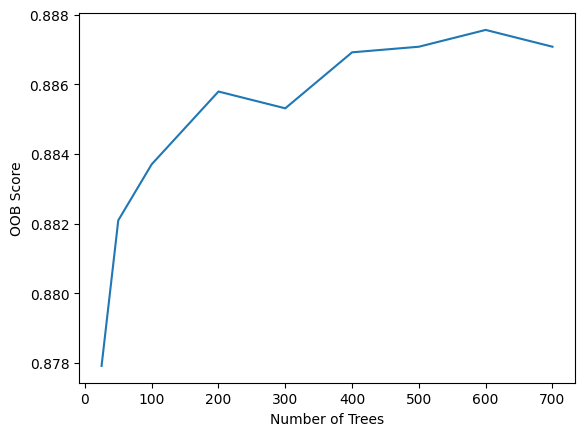

Classification with gini criterion:
Accuracy: 0.8945
F1 Score: 0.8942


In [ ]:
scores = []
for n in n_decision_trees:
  clf = RandomForestClassifier(n_estimators=n, criterion=criteria[0], random_state=101, oob_score=True)
  clf.fit(X_class_train, Y_class_train)
  scores.append(clf.oob_score_)

plt.plot(n_decision_trees, scores)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Score")
plt.show()

best_estimator = n_decision_trees[scores.index(max(scores))]
clf = RandomForestClassifier(n_estimators=best_estimator, criterion=criteria[0], random_state=101)
clf.fit(X_class_train, Y_class_train)
Y_class_pred = clf.predict(X_class_test)

accuracy = accuracy_score(Y_class_test, Y_class_pred)
f1 = f1_score(Y_class_test, Y_class_pred, average='weighted')


print(f"Classification with {criteria[0]} criterion:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


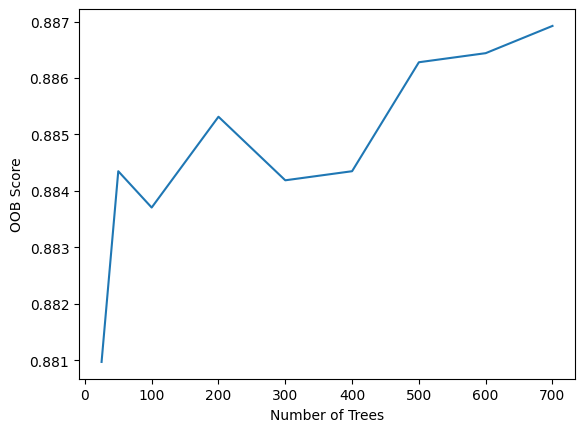

Classification with entropy criterion:
Accuracy: 0.8977
F1 Score: 0.8975


In [ ]:
scores = []
for n in n_decision_trees:
  clf = RandomForestClassifier(n_estimators=n, criterion=criteria[1], random_state=101, oob_score=True)
  clf.fit(X_class_train, Y_class_train)
  scores.append(clf.oob_score_)

plt.plot(n_decision_trees, scores)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Score")
plt.show()

best_estimator = n_decision_trees[scores.index(max(scores))]
clf = RandomForestClassifier(n_estimators=best_estimator, criterion=criteria[1], random_state=101)
clf.fit(X_class_train, Y_class_train)
Y_class_pred = clf.predict(X_class_test)

accuracy = accuracy_score(Y_class_test, Y_class_pred)
f1 = f1_score(Y_class_test, Y_class_pred, average='weighted')


print(f"Classification with {criteria[1]} criterion:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


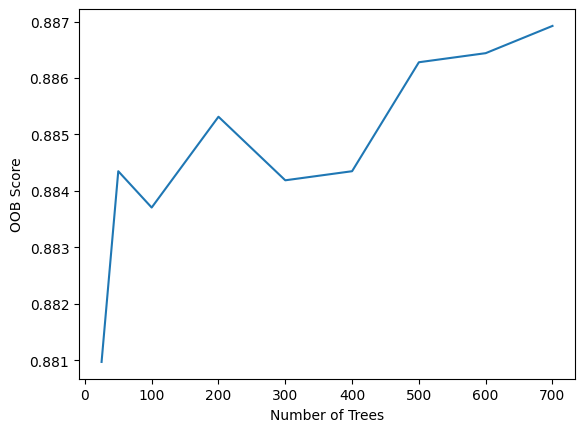

Classification with log_loss criterion:
Accuracy: 0.8977
F1 Score: 0.8975


In [ ]:
scores = []
for n in n_decision_trees:
  clf = RandomForestClassifier(n_estimators=n, criterion=criteria[2], random_state=101, oob_score=True)
  clf.fit(X_class_train, Y_class_train)
  scores.append(clf.oob_score_)

plt.plot(n_decision_trees, scores)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Score")
plt.show()

best_estimator = n_decision_trees[scores.index(max(scores))]
clf = RandomForestClassifier(n_estimators=best_estimator, criterion=criteria[2], random_state=101)
clf.fit(X_class_train, Y_class_train)
Y_class_pred = clf.predict(X_class_test)

accuracy = accuracy_score(Y_class_test, Y_class_pred)
f1 = f1_score(Y_class_test, Y_class_pred, average='weighted')


print(f"Classification with {criteria[2]} criterion:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

b) Regression

In [ ]:
X_reg = df.drop('overall', axis=1)
Y_reg = df['overall']

# Split the regression data
X_reg_train, X_reg_test, Y_reg_train, Y_reg_test = train_test_split(X_reg, Y_reg, test_size=0.2, random_state=101)

# Initialize and train Random Forest regressors
criteria = ['squared_error', 'absolute_error']
n_decision_trees = [5,10,25,50,60,70,80,90,100]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


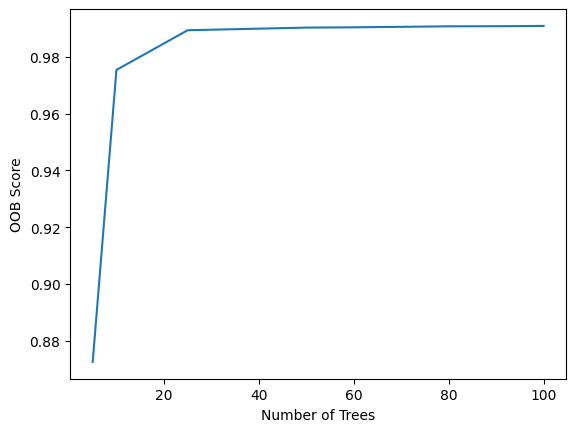

Regression with MSE criterion:
Mean Squared Error (MSE): 0.0084


In [ ]:
scores = []
for n in n_decision_trees:
    reg = RandomForestRegressor(n_estimators=n, criterion=criteria[0], random_state=42,oob_score=True)
    reg.fit(X_reg_train, Y_reg_train)
    scores.append(reg.oob_score_)
plt.plot(n_decision_trees, scores)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Score")
plt.show()

best_estimator = n_decision_trees[scores.index(max(scores))]
reg = RandomForestRegressor(n_estimators=best_estimator, criterion=criteria[0], random_state=42,oob_score=True)
reg.fit(X_reg_train, Y_reg_train)
Y_reg_pred = reg.predict(X_reg_test)
mse = mean_squared_error(Y_reg_test, Y_reg_pred)
print(f"Regression with MSE criterion:")
print(f"Mean Squared Error (MSE): {mse:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


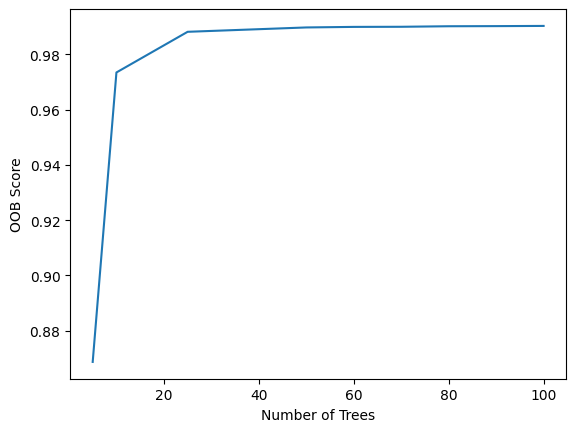

Regression with MAE criterion:
Mean Absolute Error (MAE): 0.0606


In [ ]:
scores = []
for n in n_decision_trees:
    reg = RandomForestRegressor(n_estimators=n, criterion=criteria[1], random_state=42,oob_score=True)
    reg.fit(X_reg_train, Y_reg_train)
    scores.append(reg.oob_score_)
plt.plot(n_decision_trees, scores)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Score")
plt.show()

best_estimator = n_decision_trees[scores.index(max(scores))]
reg = RandomForestRegressor(n_estimators=best_estimator, criterion=criteria[1], random_state=42)
reg.fit(X_reg_train, Y_reg_train)
Y_reg_pred = reg.predict(X_reg_test)
mae = mean_absolute_error(Y_reg_test, Y_reg_pred)
print(f"Regression with MAE criterion:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")